In [148]:

import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 


In [151]:

# Usar dataset
df_ventas = pd.read_feather('../Datasets/Ventas3.feather')

# Acotar a meses completos
df_ventas = df_ventas.query("FH_Entrega > '2016-11-01 00:00:00' and FH_Entrega < '2018-10-01 00:00:00'")


In [152]:

df_ventas.shape


(99364, 16)

In [153]:

df_ventas.dtypes


Id_Pedidos                    object
Precio_Producto              float64
Precio_Flete                 float64
Categoria_Producto            object
Estatus_Pedido                object
FH_Pedido             datetime64[ns]
FH_Aprobacion         datetime64[ns]
FH_Entrega            datetime64[ns]
F_Estimada_Entrega    datetime64[ns]
Ciudad                        object
Estado                        object
Calificacion                   int64
Year                          object
Meses                         object
Dia                           object
Periodo                       object
dtype: object

In [154]:

# Crear el perido diario
df_ventas['Dia'] = df_ventas['Dia'].map({'1':'01','2':'02','3':'03','4':'04','5':'05',
                                         '6':'06','7':'07','8':'08','9':'09','10':'10',
                                         '11':'11','12':'12','13':'13','14':'14','15':'15',
                                         '16':'16','17':'17','18':'18','19':'19','20':'20',
                                         '21':'21','22':'22','23':'23','24':'24','25':'25',
                                         '26':'26','27':'27','28':'28','29':'29','30':'30',
                                         '31':'31'
                                        })
df_ventas = df_ventas.assign(aaaa_mm_dd = "0000_00_00")
df_ventas['aaaa_mm_dd'] = df_ventas[['Year','Meses','Dia']].agg("_".join, axis = 1)


In [177]:

# Crear el periodo semanal
df_ventas = df_ventas.assign(Semana = df_ventas['FH_Entrega'].dt.isocalendar().week)
df_ventas = df_ventas.assign(Year_Semana = "0000_00")
df_ventas['Semana'] = df_ventas['Semana'].map({
                                1:'01',2:'02',3:'03',4:'04',5:'05',6:'06',7:'07',8:'08',9:'09',10:'10'
                                ,11:'11',12:'12',13:'13',14:'14',15:'15',16:'16',17:'17',18:'18',19:'19',20:'20'
                                ,21:'21',22:'22',23:'23',24:'24',25:'25',26:'26',27:'27',28:'28',29:'29',30:'30'
                                ,31:'31',32:'32',33:'33',34:'34',35:'35',36:'36',37:'37',38:'38',39:'39',40:'40'
                                ,41:'41',42:'42',43:'43',44:'44',45:'45',46:'46',47:'47',48:'48',49:'49',50:'50'
                                ,51:'51',52:'52'})
df_ventas['Year_Semana'] = df_ventas[['Year','Semana']].agg("_".join, axis = 1)


In [185]:

# Grafica de ventas diarias
df_vd = df_ventas.groupby('aaaa_mm_dd')['aaaa_mm_dd'].count()


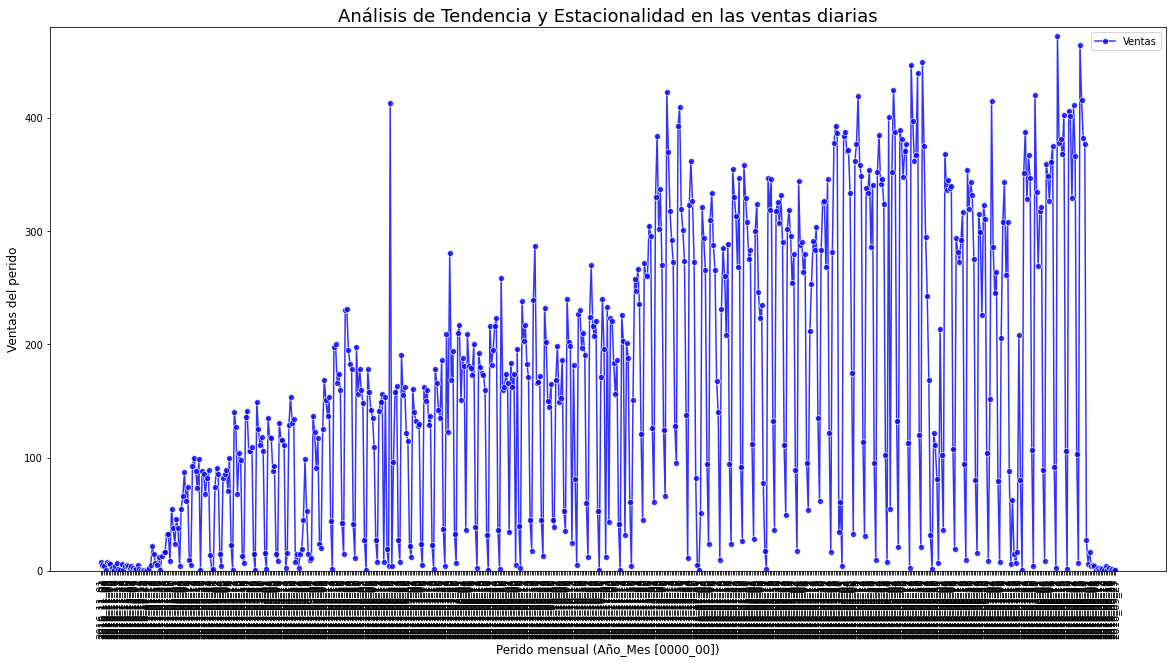

In [196]:

plt.figure(figsize=(20,10))
ax = sns.lineplot(x = df_vd.index, y = df_vd.values, alpha = 0.8, linestyle = '-', marker = 'o', color = 'b', label = 'Ventas')
plt.title('Análisis de Tendencia y Estacionalidad en las ventas diarias', fontsize=18)
plt.ylabel('Ventas del perido', fontsize=12)
plt.xlabel('Perido mensual (Año_Mes [0000_00])', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,480) 
plt.legend()
plt.show()


In [194]:

# Grafica de ventas semanales
# df_vs = df_ventas['Year_Semana'].value_counts() # No mantiene orden en los indices
#df_vs = df_ventas.groupby('Year_Semana')['Year_Semana'].count()
df_vs.describe()


count      99.000000
mean     1003.676768
std       650.273252
min         1.000000
25%       508.000000
50%       978.000000
75%      1573.000000
max      2154.000000
Name: Year_Semana, dtype: float64

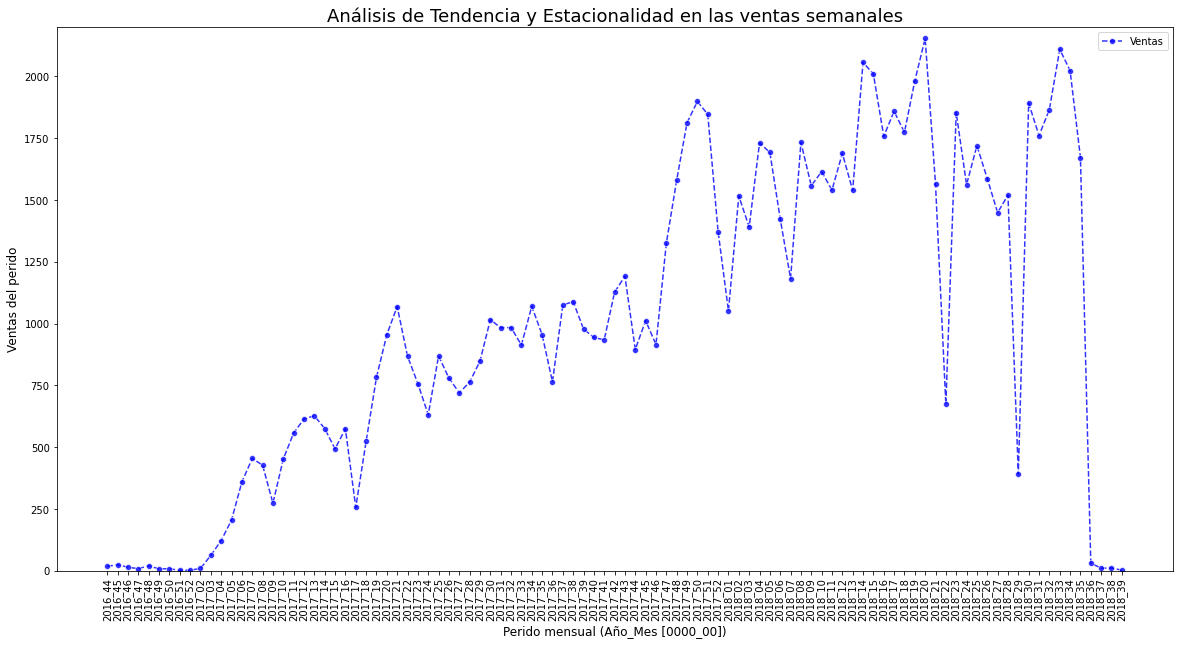

In [197]:

plt.figure(figsize=(20,10))
ax = sns.lineplot(x = df_vs.index, y = df_vs.values, alpha = 0.8, linestyle = '--', marker = 'o', color = 'b', label = 'Ventas')
plt.title('Análisis de Tendencia y Estacionalidad en las ventas semanales', fontsize=18)
plt.ylabel('Ventas del perido', fontsize=12)
plt.xlabel('Perido mensual (Año_Mes [0000_00])', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,2200) 
plt.legend()
plt.show()


In [159]:

# Exportar el Dataset
df_ventas.reset_index().to_feather('../Datasets/Ventas4.ftr')
